# PHASE 1

In [6]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [7]:
import pandas as pd 
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/renjithphilip/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/renjithphilip/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
mydata= pd.read_csv(r"/home/renjithphilip/Downloads/BBC News Train.csv")

In [9]:
mydata.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# Understanding features & target variables_ip&op

In [10]:
mydata['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [11]:
mydata.shape

(1490, 3)

In [12]:
mydata.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

# Checking for null/missing values

In [13]:
mydata.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

# Countplot of Target Variable 

/home/renjithphilip/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

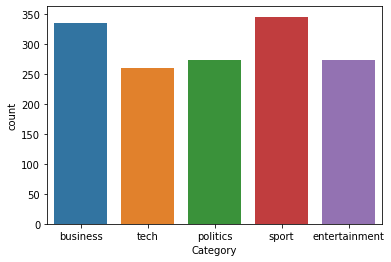

In [14]:
sns.countplot(mydata.Category)

In [15]:
mydata["newslength"]= mydata["Text"].str.len()
mydata["newslength"]

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: newslength, Length: 1490, dtype: int64

# Distribution Plot

/home/renjithphilip/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'News length Distribution')

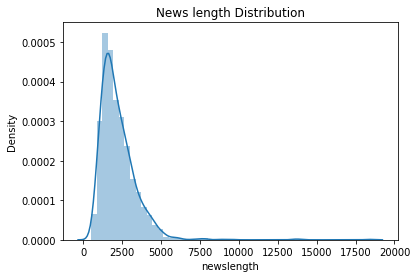

In [16]:
sns.distplot(mydata['newslength']).set_title("News length Distribution")

# Wordcloud

In [17]:
def create_wordcloud(words):
    wordcloud= WordCloud(width=800, height=500, random_state =21, max_font_size =110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

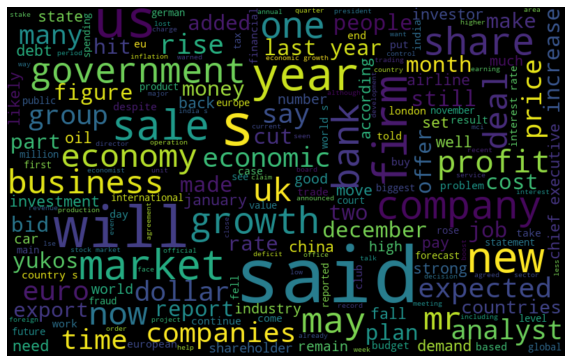

In [18]:
subset = mydata[mydata.Category =='business']
text=subset.Text.values
words=''.join(text)
create_wordcloud(words)

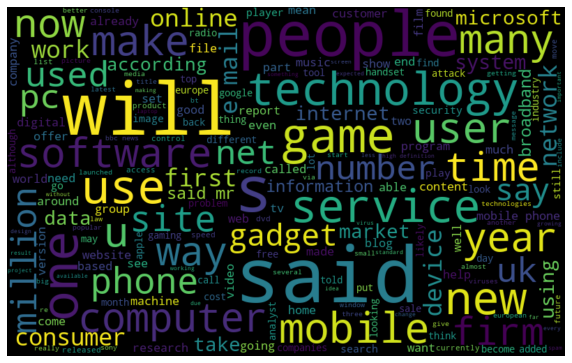

In [19]:
subset = mydata[mydata.Category =='tech']
text=subset.Text.values
words=''.join(text)
create_wordcloud(words)

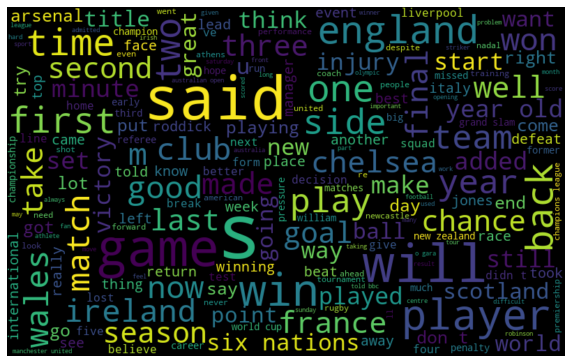

In [20]:
subset = mydata[mydata.Category =='sport']
text=subset.Text.values
words=''.join(text)
create_wordcloud(words)

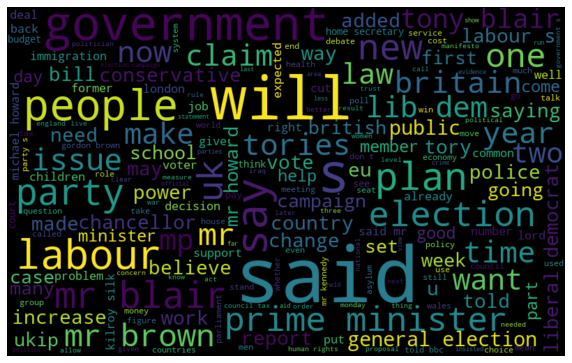

In [21]:
subset = mydata[mydata.Category =='politics']
text=subset.Text.values
words=''.join(text)
create_wordcloud(words)

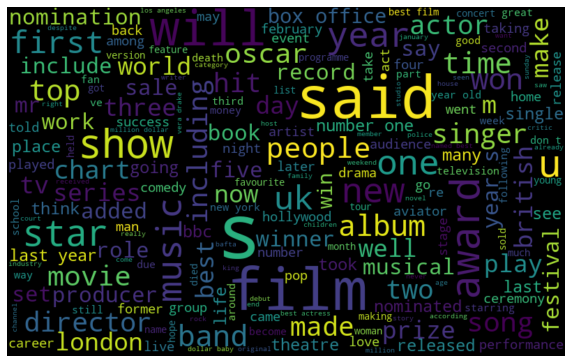

In [22]:
subset = mydata[mydata.Category =='entertainment']
text=subset.Text.values
words=''.join(text)
create_wordcloud(words)

# Cleaning Data

In [23]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text
        

In [25]:
mydata['Text_parsed']=mydata['Text'].apply(process_text)
mydata.head()

,ArticleId,Text,Category,newslength,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...
